#  Introduction

## Problem Statement
*  there is a change in trend that occurs due to uncertain conditions causing excessive stock of goods, so sometimes goods that have been purchased cannot be resold because the product has been piling up too long in the inventory.

*  determining the storage of stock goods by analyzing using sales data for the previous month / year because the data in the previous month usually has an impact on future sales, while sales that occur do not always follow the previous month's data 

## Data Provided
The Data that is used in this project are
*     **sale_items.csv** - Contains the details of historical daily sales of a customer
*     **sales.csv** - Contains the historical daily sales of a customer
*     **sma_categories.csv** - Contains info about category of products
*     **sma_companies.csv** - Contains information about the customer of company X
*     **sma_products.csv** - Contains list of products that is sold in the companies
We will have a sneak peak into the dataset below 

# Content:
1. Exploratory Data Analysis
     - Loading necessary libraries
     - Reading the dataset
     - Data Preprocessing
     - Summary Statistics
     - Time Series Views
     - Impact of Events and SNAP days on sales
     - Analysis on prices changes
2. Implement model
     - use only data sales 
     - use with data external such as IHK, Inflasi, IHP
3. Use specific data for trend product
4. Use Time lag in analysis

# 1. Loading necessary libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os #using operating system dependent functionality
from datetime import datetime#datetime module supplies classes for manipulating dates and times.
import math # provides access to the mathematical functions
from IPython.display import display, HTML

#For Plotting
# Using plotly + cufflinks in offline mode
import plotly as py
import plotly.graph_objs as go
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.set_config_file(offline=True)
init_notebook_mode(connected=True)

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#For time series decomposition
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

from datetime import timedelta

#Pandas option
pd.options.display.float_format = '{:.2f}'.format

# 2. Reading the Dataset

In [2]:
df_sales = pd.read_csv('proyek_skripsi/sales.csv')
df_sale_items = pd.read_csv('proyek_skripsi/sale_items.csv')
df_products = pd.read_csv('proyek_skripsi/sma_products.csv')
df_category = pd.read_csv('proyek_skripsi/sma_categories.csv')
df_companies = pd.read_csv('proyek_skripsi/sma_companies.csv')
df_ihk_inflasi = pd.read_csv("proyek_skripsi/Data_IHK_Inflasi_Nasional.csv")
df_ihp = pd.read_csv("proyek_skripsi/DataIHPKhususPlastikKaret.csv")

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning:

Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning:

Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.



# 3. Data Preprocessing

## Data sales Preprocess

In [3]:
df_sales.head()

,id,date,quote_id,reference_no,customer_id,customer,biller_id,biller,warehouse_id,note,...,rounding,suspend_note,api,shop,address_id,reserve_id,hash,salesman_id,salesman_commission,total_commission
0,22,2017-07-15 13:35:00,0,HBA/2017/07/0016,127,DAMAI SANTOSO,3,Test Biller,1,NaN,...,nan,nan,0,0,nan,nan,85470c87f1f753c6b657d6529d83354d7561bc4b296a51...,nan,nan,nan
1,24,2017-07-03 08:00:00,0,HBA/2017/07/0018,132,AWANG JAYA,3,Test Biller,1,NaN,...,nan,nan,0,0,nan,nan,16c4a643d0d939f6b022b2ec1965e1c2a90f1a8a1e8c1b...,nan,nan,nan
2,25,2017-07-04 08:00:00,0,HBA/2017/07/0019,124,CV TRISAKTI,3,Test Biller,1,&lt;p&gt;CANDY BOX DAN EMBER 0&period;5 TDK TE...,...,nan,nan,0,0,nan,nan,352c58cffea15e09329bb97140f86f0056a9d67bc64c13...,nan,nan,nan
3,26,2017-07-04 08:00:00,0,HBA/2017/07/0020,125,GOGO,3,Test Biller,1,&lt;p&gt;hb0280&lt;&sol;p&gt;,...,nan,nan,0,0,nan,nan,b4195a3294e823f77f655401fff69cc8da9e972d842a36...,nan,nan,nan
4,27,2017-07-04 08:00:00,0,HBA/2017/07/0021,126,CV TIGA PILAR,3,Test Biller,1,&lt;p&gt;HB0281&lt;&sol;p&gt;,...,nan,nan,0,0,nan,nan,de9f776ac2749c4e81bf5b6aeb10e0eeae737c31b9b691...,nan,nan,nan


In [4]:
#drop column that has > 80% null value
df_sales = df_sales.drop(['note', 'staff_note', 'order_discount_id', 'updated_by', 'updated_at', 'return_id', 'attachment', 'return_sale_ref', 'sale_id', 'rounding', 'suspend_note', 'address_id', 'reserve_id', 'salesman_id', 'salesman_commission', 'total_commission', 'product_discount', 'total_discount', 'grand_total', 'payment_term', 'due_date', 'paid', 'customer', 'quote_id', 'reference_no', 'biller_id', 'biller', 'warehouse_id', 'order_discount', 'product_tax', 'order_tax_id', 'order_tax', 'total_tax', 'shipping', 'pos', 'surcharge', 'api', 'shop', 'hash', 'created_by', 'sale_status', 'payment_status', 'return_sale_total', 'total_items'], axis=1)

In [5]:
df_sales = df_sales[(df_sales[['total']] >= 0).all(1)]
df_sales = df_sales.rename(columns={'id': 'sale_id'})
df_sales = df_sales.loc[(df_sales['date'] >= '2017-02-31')]

In [6]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17392 entries, 0 to 17496
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sale_id      17392 non-null  int64  
 1   date         17392 non-null  object 
 2   customer_id  17392 non-null  int64  
 3   total        17392 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 679.4+ KB


## Data sale_items Preprocess

In [7]:
#remove unnessary column
df_sale_items.drop(['serial_no', 'sale_item_id', 'comment', 'id', 'product_type', 'option_id', 'unit_price', 'net_unit_price', 'warehouse_id', 'item_tax', 'tax_rate_id', 'tax', 'product_unit_id', 'product_unit_code', 'unit_quantity'], inplace=True, axis=1)

In [8]:
df_sale_items = df_sale_items[(df_sale_items[['quantity', 'item_discount', 'real_unit_price', 'subtotal']] >= 0).all(1)]
df_sale_items = df_sale_items.fillna(0)

## Merge data sales with sale_items -> sales_saleitems

In [9]:
df_sales_saleitems = pd.merge(df_sales, df_sale_items, on='sale_id', how='outer')

In [10]:
df_sales_saleitems = df_sales_saleitems.dropna()
df_sales_saleitems.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52385 entries, 0 to 52384
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sale_id          52385 non-null  int64  
 1   date             52385 non-null  object 
 2   customer_id      52385 non-null  float64
 3   total            52385 non-null  float64
 4   product_id       52385 non-null  int64  
 5   product_code     52385 non-null  object 
 6   product_name     52385 non-null  object 
 7   quantity         52385 non-null  float64
 8   discount         52385 non-null  object 
 9   item_discount    52385 non-null  float64
 10  subtotal         52385 non-null  float64
 11  real_unit_price  52385 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 5.2+ MB


In [11]:
df_sales_saleitems.head()

,sale_id,date,customer_id,total,product_id,product_code,product_name,quantity,discount,item_discount,subtotal,real_unit_price
0,22,2017-07-15 13:35:00,127.00,2000000.00,438,ABE-003,ESKAN MINI KARINA,40.00,0,0.00,2000000.00,50000.00
1,24,2017-07-03 08:00:00,132.00,825000.00,313,KWP-018,POT SEGI 25 HTM VIP,30.00,0,0.00,825000.00,27500.00
2,25,2017-07-04 08:00:00,124.00,4686000.00,666,CSC-005,CANDY BOX 8011 (M) CLIO,10.00,0,0.00,410000.00,41000.00
3,25,2017-07-04 08:00:00,124.00,4686000.00,667,CSC-006,CANDY BOX 8012 (L) CLIO,8.00,0,0.00,368000.00,46000.00
4,25,2017-07-04 08:00:00,124.00,4686000.00,678,CSC-017,CATERING BOX TOKYO CLEO,8.00,0,0.00,504000.00,63000.00


## Data Products Preprocess

In [12]:
#remove unnessary column
df_products.drop(['code', 'name', 'unit', 'product_price', 'alert_quantity', 'image', 'subcategory_id', 'cf1', 'cf2', 'cf3', 'cf4',
       'cf5', 'cf6', 'quantity', 'tax_rate', 'track_quantity', 'details',
       'warehouse', 'barcode_symbology', 'file', 'product_details',
       'tax_method', 'type', 'supplier1', 'supplier1price', 'supplier2',
       'supplier2price', 'supplier3', 'supplier3price', 'supplier4',
       'supplier4price', 'supplier5', 'supplier5price', 'promotion',
       'promo_price', 'start_date', 'end_date', 'supplier1_part_no',
       'supplier2_part_no', 'supplier3_part_no', 'supplier4_part_no',
       'supplier5_part_no', 'sale_unit', 'purchase_unit', 'brand', 'slug',
       'featured', 'weight'], inplace=True, axis=1)

In [13]:
df_products = df_products.rename(columns={'id': 'product_id'})
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5746 entries, 0 to 5745
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   product_id   5746 non-null   int64  
 1   cost         5746 non-null   float64
 2   category_id  5746 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 134.8 KB


## Merge data sales_saleitems with products -> sales_items_product

In [14]:
#merge result and product csv
df_sales_items_product = pd.merge(df_sales_saleitems, df_products, on='product_id', how='outer')

In [15]:
df_sales_items_product = df_sales_items_product.dropna()
df_sales_items_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51876 entries, 0 to 52384
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sale_id          51876 non-null  float64
 1   date             51876 non-null  object 
 2   customer_id      51876 non-null  float64
 3   total            51876 non-null  float64
 4   product_id       51876 non-null  int64  
 5   product_code     51876 non-null  object 
 6   product_name     51876 non-null  object 
 7   quantity         51876 non-null  float64
 8   discount         51876 non-null  object 
 9   item_discount    51876 non-null  float64
 10  subtotal         51876 non-null  float64
 11  real_unit_price  51876 non-null  float64
 12  cost             51876 non-null  float64
 13  category_id      51876 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 5.9+ MB


In [16]:
df_sales_items_product.head()

,sale_id,date,customer_id,total,product_id,product_code,product_name,quantity,discount,item_discount,subtotal,real_unit_price,cost,category_id
0,22.00,2017-07-15 13:35:00,127.00,2000000.00,438,ABE-003,ESKAN MINI KARINA,40.00,0,0.00,2000000.00,50000.00,49200.00,2.00
1,411.00,2017-08-30 12:32:25,131.00,9833700.00,438,ABE-003,ESKAN MINI KARINA,16.00,0,0.00,816000.00,51000.00,49200.00,2.00
2,421.00,2017-08-30 15:27:38,127.00,7364400.00,438,ABE-003,ESKAN MINI KARINA,40.00,0,0.00,2000000.00,50000.00,49200.00,2.00
3,508.00,2017-09-12 08:25:06,27.00,17220000.00,438,ABE-003,ESKAN MINI KARINA,40.00,0,0.00,2040000.00,51000.00,49200.00,2.00
4,531.00,2017-09-15 08:26:00,145.00,21145000.00,438,ABE-003,ESKAN MINI KARINA,40.00,0,0.00,2000000.00,50000.00,49200.00,2.00


## Data category Preprocess 

In [17]:
df_category.drop(['image', 'parent_id', 'slug'], inplace=True, axis=1)

In [18]:
df_category = df_category.rename(columns={'id': 'category_id', 'code': 'category_code', 'name': 'category_name'})
df_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category_id    40 non-null     int64 
 1   category_code  40 non-null     object
 2   category_name  40 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


## Merge df_sales_items_product with category -> sales_prod_category

In [19]:
#merge result and product csv
df_sales_prod_category = pd.merge(df_sales_items_product, df_category, on='category_id', how='outer')

In [20]:
df_sales_prod_category = df_sales_prod_category.dropna()
df_sales_prod_category.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51876 entries, 0 to 51875
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sale_id          51876 non-null  float64
 1   date             51876 non-null  object 
 2   customer_id      51876 non-null  float64
 3   total            51876 non-null  float64
 4   product_id       51876 non-null  float64
 5   product_code     51876 non-null  object 
 6   product_name     51876 non-null  object 
 7   quantity         51876 non-null  float64
 8   discount         51876 non-null  object 
 9   item_discount    51876 non-null  float64
 10  subtotal         51876 non-null  float64
 11  real_unit_price  51876 non-null  float64
 12  cost             51876 non-null  float64
 13  category_id      51876 non-null  float64
 14  category_code    51876 non-null  object 
 15  category_name    51876 non-null  object 
dtypes: float64(10), object(6)
memory usage: 6.7+ MB


In [21]:
df_sales_prod_category.head()

,sale_id,date,customer_id,total,product_id,product_code,product_name,quantity,discount,item_discount,subtotal,real_unit_price,cost,category_id,category_code,category_name
0,22.00,2017-07-15 13:35:00,127.00,2000000.00,438.00,ABE-003,ESKAN MINI KARINA,40.00,0,0.00,2000000.00,50000.00,49200.00,2.00,ESKAN,ESKAN
1,411.00,2017-08-30 12:32:25,131.00,9833700.00,438.00,ABE-003,ESKAN MINI KARINA,16.00,0,0.00,816000.00,51000.00,49200.00,2.00,ESKAN,ESKAN
2,421.00,2017-08-30 15:27:38,127.00,7364400.00,438.00,ABE-003,ESKAN MINI KARINA,40.00,0,0.00,2000000.00,50000.00,49200.00,2.00,ESKAN,ESKAN
3,508.00,2017-09-12 08:25:06,27.00,17220000.00,438.00,ABE-003,ESKAN MINI KARINA,40.00,0,0.00,2040000.00,51000.00,49200.00,2.00,ESKAN,ESKAN
4,531.00,2017-09-15 08:26:00,145.00,21145000.00,438.00,ABE-003,ESKAN MINI KARINA,40.00,0,0.00,2000000.00,50000.00,49200.00,2.00,ESKAN,ESKAN


## Data Companies Preprocess

In [22]:
#remove unnessary column
df_companies.drop(['group_id', 'vat_no', 'group_name', 'customer_group_id',
       'customer_group_name', 'name', 'address', 'state', 'postal_code', 'country', 'phone', 'email', 'cf1', 'cf2',
       'cf3', 'cf4', 'cf5', 'cf6', 'invoice_footer', 'payment_term', 'logo',
       'award_points', 'deposit_amount', 'price_group_id', 'price_group_name',
       'email_footer'], inplace=True, axis=1)

In [23]:
df_companies = df_companies.dropna()
df_companies = df_companies.rename(columns={'id': 'customer_id'})
df_companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 0 to 454
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  453 non-null    int64 
 1   company      453 non-null    object
 2   city         453 non-null    object
dtypes: int64(1), object(2)
memory usage: 14.2+ KB


## Clean Companies Location 

In [24]:
df_companies = df_companies[~df_companies.city.str.contains("-")]

In [25]:
#change list into Jawa
list_jawa = ['JAWA TIMUR', 'BALI', 'SURABAYA', 'MADURA', 'JAWA TENGAH', 'JAKARTA', 'DENPASAR', 'JAWA TINUR', 'SBY', 'PARE-KEDIRI, JATIM', 'BAU BAU', 'BONDOWOSO', 
    'GRESIK', 'TULUNGAGUNG, JAWA TIMUR', 'LOMBOK', 'JAWA TENGGAH', 'BLITAR, JAWA TIMUR',
    'JOGJA', '( PERUM DARMO SENTOSA RAYA) ,SURABAYA', 'JAKARTA BARAT', 'BLORA, JAWA TENGAH'
    'PASURUAN, JAWA TIMUR', 'BOJONEGORO', 'JAWA BARAT', 'GENTENG', 'CEPU', 'KEDIRI, JAWA TIMUR', 'SURABAYA, JATIM', 'MALANG']


for i in list_jawa:
    df_companies.loc[df_companies['city'].str.contains(i), 'city'] = 'JAWA'

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



In [26]:
#change list into sulawesi
list_sulawesi = ["BANGGAI, SULAWESI", "SLAWESI", "WAKATOBI, SULAWESI", "MAKASAR"]


for i in list_sulawesi:
    df_companies.loc[df_companies['city'].str.contains(i), 'city'] = 'SULAWESI'

In [27]:
#change list into papua
list_papua = ["JAYAPURA", "MERAUKE"]


for i in list_papua:
    df_companies.loc[df_companies['city'].str.contains(i), 'city'] = 'PAPUA'

In [28]:
#change list into kalimantan
df_companies.loc[df_companies['city'].str.contains(" KALIMANTAN"), 'city'] = 'KALIMANTAN'

In [29]:
#change list into nusa tenggara
list_nusatenggara = ["NTT", "NTB"]


for i in list_nusatenggara:
    df_companies.loc[df_companies['city'].str.contains(i), 'city'] = 'NUSA TENGGARA'

In [30]:
df_companies['city'].value_counts()

JAWA             201
SULAWESI         126
KALIMANTAN        67
PAPUA             33
NUSA TENGGARA     13
SUMATRA            1
Name: city, dtype: int64

## merge df_sales_prod_category with companies data -> df_result

In [31]:
#merge result and product csv
df_result = pd.merge(df_sales_prod_category, df_companies, on='customer_id', how='outer')

In [32]:
df_result = df_result.dropna()
df_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51601 entries, 0 to 51875
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sale_id          51601 non-null  float64
 1   date             51601 non-null  object 
 2   customer_id      51601 non-null  float64
 3   total            51601 non-null  float64
 4   product_id       51601 non-null  float64
 5   product_code     51601 non-null  object 
 6   product_name     51601 non-null  object 
 7   quantity         51601 non-null  float64
 8   discount         51601 non-null  object 
 9   item_discount    51601 non-null  float64
 10  subtotal         51601 non-null  float64
 11  real_unit_price  51601 non-null  float64
 12  cost             51601 non-null  float64
 13  category_id      51601 non-null  float64
 14  category_code    51601 non-null  object 
 15  category_name    51601 non-null  object 
 16  company          51601 non-null  object 
 17  city        

In [33]:
df_result.head()

,sale_id,date,customer_id,total,product_id,product_code,product_name,quantity,discount,item_discount,subtotal,real_unit_price,cost,category_id,category_code,category_name,company,city
0,22.00,2017-07-15 13:35:00,127.00,2000000.00,438.00,ABE-003,ESKAN MINI KARINA,40.00,0,0.00,2000000.00,50000.00,49200.00,2.00,ESKAN,ESKAN,DAMAI SANTOSO,JAWA
1,421.00,2017-08-30 15:27:38,127.00,7364400.00,438.00,ABE-003,ESKAN MINI KARINA,40.00,0,0.00,2000000.00,50000.00,49200.00,2.00,ESKAN,ESKAN,DAMAI SANTOSO,JAWA
2,639.00,2017-10-03 11:34:54,127.00,1600000.00,438.00,ABE-003,ESKAN MINI KARINA,32.00,0,0.00,1600000.00,50000.00,49200.00,2.00,ESKAN,ESKAN,DAMAI SANTOSO,JAWA
3,921.00,2017-11-14 14:27:00,127.00,2000000.00,438.00,ABE-003,ESKAN MINI KARINA,40.00,0,0.00,2000000.00,50000.00,49200.00,2.00,ESKAN,ESKAN,DAMAI SANTOSO,JAWA
4,1043.00,2017-11-28 14:38:00,127.00,2680000.00,438.00,ABE-003,ESKAN MINI KARINA,8.00,0,0.00,400000.00,50000.00,49200.00,2.00,ESKAN,ESKAN,DAMAI SANTOSO,JAWA


# 4. Summary Statistics

### 1.1 Sales Data (quantity)

In [34]:
df_result.city.unique()

array(['JAWA', 'KALIMANTAN', 'PAPUA', 'SULAWESI', 'NUSA TENGGARA',
       'SUMATRA'], dtype=object)

In [35]:
df_result.city.value_counts()

JAWA             20472
SULAWESI         14992
KALIMANTAN       10602
PAPUA             5192
NUSA TENGGARA      341
SUMATRA              2
Name: city, dtype: int64

In [36]:
df_result.city.value_counts(normalize =True) 

JAWA            0.40
SULAWESI        0.29
KALIMANTAN      0.21
PAPUA           0.10
NUSA TENGGARA   0.01
SUMATRA         0.00
Name: city, dtype: float64

In [37]:
#calculate total sum
df_result['total_sales'] = df_result['quantity'].sum()

In [38]:
city_data = df_result.groupby('city').agg({"total_sales":"sum"})/df_result.total_sales.sum() * 100
city_data.sort_values(by='total_sales', ascending=False)

,total_sales
city,
JAWA,39.67
SULAWESI,29.05
KALIMANTAN,20.55
PAPUA,10.06
NUSA TENGGARA,0.66
SUMATRA,0.00


### Plotting Sales Ratio based on location

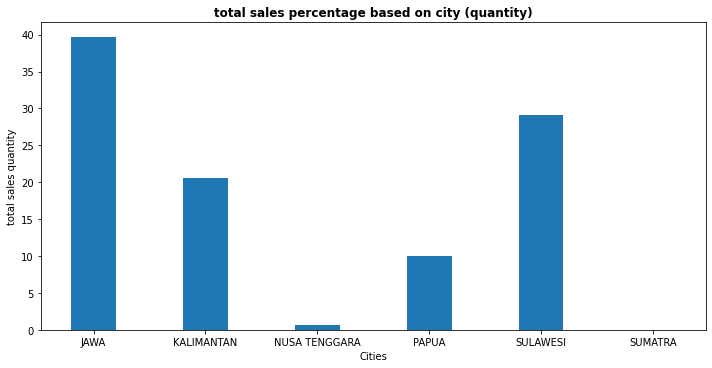

In [39]:
#get total sales ratio based on city
city_sales_data = df_result.groupby('city').agg({"total_sales":"sum"})/df_result.total_sales.sum() * 100
city_sales_data = city_sales_data.reset_index()
#plot the barchart
fig = plt.figure(figsize = (10, 5))
plt.bar(city_sales_data['city'], city_sales_data['total_sales'], width = 0.4)
plt.xlabel("Cities")
plt.ylabel("total sales quantity")
plt.tight_layout()
plt.title("total sales percentage based on city (quantity)",fontweight = "bold")
plt.show()

In [40]:
# Let's have a look at the unique categories 
df_result.category_name.unique()

array(['ESKAN', 'POT', 'BOX', 'TEMPAT PENYIMPANAN MKN', 'HANGER',
       'SEALWARE/TOPLES', 'BOTOL AIR', 'ALAT\xa0KEBERSIHAN',
       'PERALATAN\xa0DAPUR', 'KERANJANG PLASTIK', 'BAK/EMBER',
       'PERALATAN\xa0MAKAN', 'NAMPAN', 'CETAKAN', 'General', 'BANGKU',
       'PERALATAN\xa0MANDI', 'RAK', 'TEMPAT SAMPAH',
       'PERLENGKAPAN\xa0KANTOR', 'CELENGAN', 'BOTOL KECAP', 'DISPENSER',
       'SIKAT', 'RAK\xa0SEPATU', 'PERALATAN\xa0KANTOR', 'JEPITAN',
       'BASKOM', 'BAK MEMBLE', 'BAK KUPING', 'BAK USA', 'TIMBA COR',
       'TIKAR', 'ALAT\xa0BANGUNAN'], dtype=object)

In [41]:
#Let's have a look at the total sales from each of the 3 categries
print("Total Sales from each category")
category_data = df_result.groupby('category_name').agg({"total_sales":"sum"})/df_result.total_sales.sum() * 100
category_data.sort_values(by='total_sales', ascending=False).head(10)

Total Sales from each category


,total_sales
category_name,
General,14.36
POT,13.14
SEALWARE/TOPLES,12.03
TEMPAT PENYIMPANAN MKN,9.91
PERALATAN MAKAN,7.72
PERALATAN DAPUR,5.07
ALAT KEBERSIHAN,4.65
BOTOL AIR,4.43
BOX,3.52


### Plotting Sales Ratio based on category code

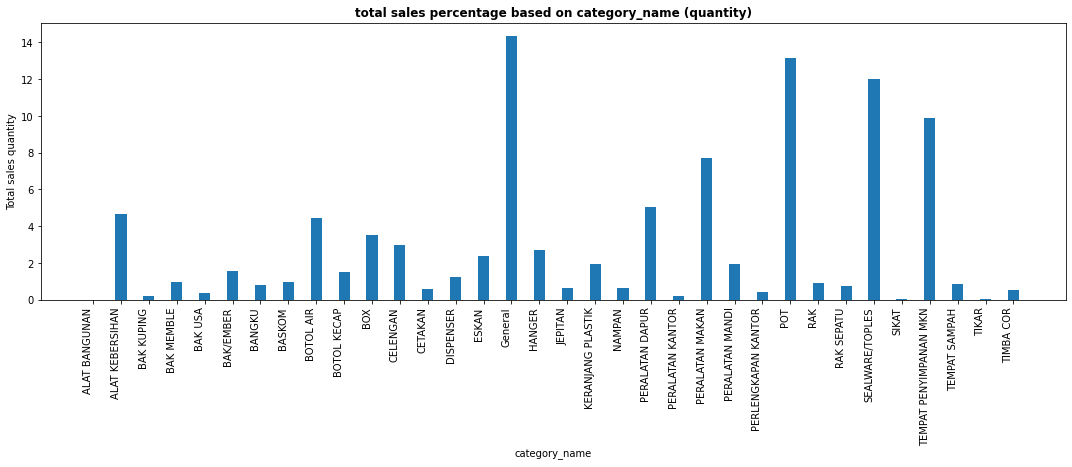

In [42]:
#Caculating the sales ratio for the 3 categories
category_sales_data = df_result.groupby('category_name').agg({"total_sales":"sum"})/df_result.total_sales.sum() * 100
category_sales_data = category_sales_data.reset_index()
#plot the barchart
fig = plt.figure(figsize = (15, 5))
plt.bar(category_sales_data['category_name'], category_sales_data['total_sales'], width = 0.4)
plt.xlabel("category_name")
plt.ylabel("Total sales quantity")
plt.tight_layout()
plt.title("total sales percentage based on category_name (quantity)",fontweight = "bold")
plt.gcf().autofmt_xdate(rotation=90)
plt.show()

In [43]:
print("Total Sales distribution(in %) in each city with different category_name")
cat_state_sales = df_result.groupby(['category_name','city']).agg({"total_sales":"sum"}).groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()
cat_state_sales

Total Sales distribution(in %) in each city with different category_name


total_sales                                           \
city                          JAWA KALIMANTAN NUSA TENGGARA  PAPUA SULAWESI   
category_name                                                                 
ALAT BANGUNAN                  nan        nan           nan 100.00      nan   
ALAT KEBERSIHAN              18.00      20.71          1.83  22.75    36.62   
BAK KUPING                   79.61        nan          1.94   4.85    13.59   
BAK MEMBLE                   54.42       3.14          0.39   9.82    32.22   
BAK USA                      40.31      27.75           nan   3.66    28.27   
BAK/EMBER                    43.64      12.22          0.12  14.46    29.55   
BANGKU                       31.57      17.59          0.72  17.83    32.29   
BASKOM                       21.47      18.00           nan  24.34    36.20   
BOTOL AIR                    45.88      30.21          0.39   3.24    20.27   
BOTOL KECAP                  43.16      22.56          0.26   4.95    29.07   
BOX                          50.52      12.56          0.66  11.13    25.12   
CELENGAN                     24.19      12.77          2.26  14.77    46.00   
CETAKAN                      51.86      12.88           nan   9.83    25.42   
DISPENSER                    42.97      28.59          1.09   4.22    23.12   
ESKAN                        31.88      25.23          0.08   8.05    34.76   
General                      31.96      21.57          0.90  14.90    30.67   
HANGER                       15.37      31.75          0.79  13.65    38.43   
JEPITAN                      17.72      31.23          0.90   8.11    42.04   
KERANJANG PLASTIK            46.97      12.21          0.79  10.63    29.39   
NAMPAN                       36.95      23.46          0.59   7.33    31.67   
PERALATAN DAPUR              28.50      20.77          0.42  14.38    35.92   
PERALATAN KANTOR             27.66      13.83          2.13  14.89    41.49   
PERALATAN MAKAN              37.99      22.86          0.95  11.09    27.10   
PERALATAN MANDI              31.74      22.46          0.40  18.16    27.25   
PERLENGKAPAN KANTOR          25.93      25.46          0.93  15.74    31.94   
POT                          52.80      15.96          0.37   5.75    25.11   
RAK                          36.48      19.29           nan  10.90    33.33   
RAK SEPATU                   27.16      26.65           nan  17.26    28.93   
SEALWARE/TOPLES              48.41      24.40          0.47   3.98    22.74   
SIKAT                        40.91      50.00           nan   4.55     4.55   
TEMPAT PENYIMPANAN MKN       48.41      18.68          0.20   4.89    27.83   
TEMPAT SAMPAH                24.94      21.85          2.21   9.27    41.72   
TIKAR                        40.00      30.00           nan    nan    30.00   
TIMBA COR                    61.25       1.48          0.37   8.12    28.78   

                                
city                   SUMATRA  
category_name                   
ALAT BANGUNAN              nan  
ALAT KEBERSIHAN           0.08  
BAK KUPING                 nan  
BAK MEMBLE                 nan  
BAK USA                    nan  
BAK/EMBER                  nan  
BANGKU                     nan  
BASKOM                     nan  
BOTOL AIR                  nan  
BOTOL KECAP                nan  
BOX                        nan  
CELENGAN                   nan  
CETAKAN                    nan  
DISPENSER                  nan  
ESKAN                      nan  
General                    nan  
HANGER                     nan  
JEPITAN                    nan  
KERANJANG PLASTIK          nan  
NAMPAN                     nan  
PERALATAN DAPUR            nan  
PERALATAN KANTOR           nan  
PERALATAN MAKAN            nan  
PERALATAN MANDI            nan  
PERLENGKAPAN KANTOR        nan  
POT                        nan  
RAK                        nan  
RAK SEPATU                 nan  
SEALWARE/TOPLES            nan  
SIKAT                      nan  
TEMPAT PEN

### 1.2 Real Data Price

In [44]:
df_result['real_unit_price'].describe()

count     51601.00
mean      93270.28
std       98554.34
min           0.00
25%       36000.00
50%       60000.00
75%      113000.00
max     1410000.00
Name: real_unit_price, dtype: float64

In [45]:
#Let's look at items price avg based on category name
item_store_prices = df_result.groupby(["category_name"]).agg({"real_unit_price":"mean"})             
item_store_prices_avg = item_store_prices.sort_values(["real_unit_price"],ascending=False)
item_store_prices_avg.head()

,real_unit_price
category_name,
BAK MEMBLE,268902.75
BANGKU,204792.29
BAK USA,197094.24
TEMPAT SAMPAH,178298.23
PERLENGKAPAN KANTOR,174084.49


In [46]:
#Let's look at items price avg based on city
item_store_prices = df_result.groupby(["city"]).agg({"real_unit_price":"mean"})             
item_store_prices_avg = item_store_prices.sort_values(["real_unit_price"],ascending=False)
item_store_prices_avg.head()

,real_unit_price
city,
PAPUA,130330.28
SUMATRA,108750.00
NUSA TENGGARA,102850.49
JAWA,91668.57
SULAWESI,90032.63


In [47]:
#Let's look at items price avg based on city and category_name
item_store_prices = df_result.groupby(["category_name", "city"]).agg({"real_unit_price":"mean"})             
item_store_prices_avg = item_store_prices.sort_values(["real_unit_price"],ascending=False).reset_index()
item_store_prices_avg.head()

,category_name,city,real_unit_price
0,BAK/EMBER,PAPUA,370198.53
1,TEMPAT SAMPAH,NUSA TENGGARA,320850.00
2,BAK MEMBLE,JAWA,273063.18
3,BANGKU,NUSA TENGGARA,266666.67
4,BAK MEMBLE,PAPUA,265660.00


### 1.3 Time series Analysis

In [48]:
df_result['date'] = pd.to_datetime(df_result['date'], errors='coerce')

In [49]:
#Monthly sales
df_sales_month = df_result[["date", "quantity", "subtotal", "real_unit_price"]]
monthly = df_sales_month.date.dt.to_period("M")
sales_monthly = df_sales_month.groupby(monthly).sum()

In [50]:
sales_monthly.head()

,quantity,subtotal,real_unit_price
date,,,
2017-07,32150.50,1224414000.00,57471500.00
2017-08,40518.50,1589217800.00,71743950.00
2017-09,64770.50,1355597230.00,54828735.00
2017-10,74842.50,2112574480.00,91010898.00
2017-11,73724.50,1897626592.00,83482641.00


In [51]:
sales_monthly['quantity'].iplot(title="Monthly Overall Sales")

In [52]:
df_three_months = sales_monthly.rolling(3).mean()[2::3].reset_index(drop=True)

In [53]:
initial_month = sales_monthly.index[0]
df_three_months = df_three_months.set_index(initial_month+df_three_months.index*3)

In [54]:
df_three_months.index.name = 'date'
df_three_months.head()

,quantity,subtotal,real_unit_price
date,,,
2017-07,45813.17,1389743010.00,61348061.67
2017-10,63238.50,1779450290.67,75703546.33
2018-01,57684.00,1794610380.00,79112557.67
2018-04,37150.67,1333593468.00,54152193.33
2018-07,81938.17,2469864963.73,101885529.43


In [55]:
df_three_months['quantity'].iplot(title="Three Month Overall Sales")

In [56]:
sales_monthly.interpolate(inplace = True)
sales_monthly.index=sales_monthly.index.to_timestamp()

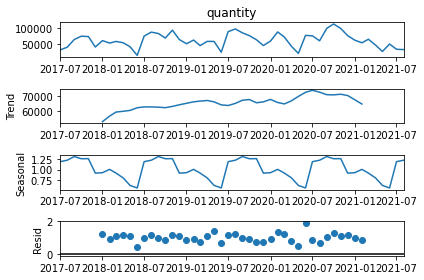

In [57]:
monthly_decomposition = seasonal_decompose(sales_monthly.quantity, model='multiplicable')
monthly_decomposition.plot()
pyplot.show()

In [58]:
df_three_months.interpolate(inplace = True)
df_three_months.index=df_three_months.index.to_timestamp()

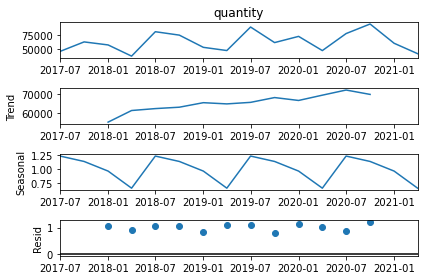

In [59]:
three_month_decomposition = seasonal_decompose(df_three_months.quantity, model='multiplicable')
three_month_decomposition.plot()
pyplot.show()

In [60]:
# #Monthly sales
# city_month_sales = df_result[['date','city','quantity']]\
# .groupby([pd.Grouper(key = 'date', freq='M'),'city'])\
# .sum().reset_index(level='city')

In [61]:
# city_month_sales.head()

### Data IHK

In [62]:
df_ihk_inflasi['date'] = pd.to_datetime(df_ihk_inflasi['date'], errors='coerce')
df_ihk_inflasi = df_ihk_inflasi.set_index('date')

In [63]:
df_penjualan_inflasi = pd.merge(sales_monthly, df_ihk_inflasi, on='date', how='outer')

In [64]:
df_penjualan_inflasi = df_penjualan_inflasi.dropna()

In [65]:
df_penjualan_inflasi['IHK'].iplot(title="Monthly Overall IHK")

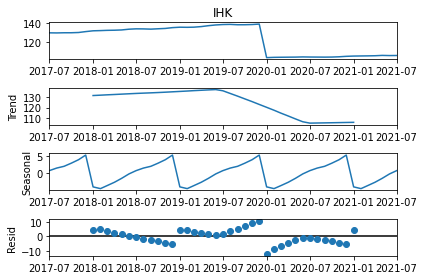

In [66]:
ihk_decompose = seasonal_decompose(df_penjualan_inflasi.IHK)
ihk_decompose.plot()
pyplot.show()

### Data Inflasi

In [67]:
df_penjualan_inflasi['Inflasi'].iplot(title="Monthly Overall Inflasi")

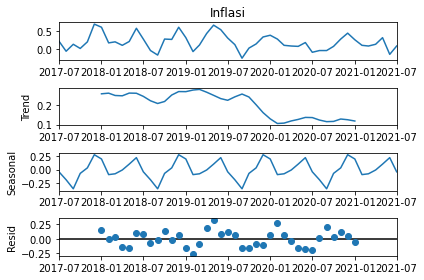

In [68]:
inflasi_decompose = seasonal_decompose(df_penjualan_inflasi.Inflasi)
inflasi_decompose.plot()
pyplot.show()

### Data IHP

In [69]:
df_ihp['date'] = pd.to_datetime(df_ihp['date'], errors='coerce')
df_ihp = df_ihp.set_index('date')

In [70]:
df_ihp['IHP'].iplot(title="Three months Overall IHP")

In [71]:
df_ihp.head()

,IHP
date,
2017-07-01,120.37
2017-10-01,121.59
2018-01-01,123.09
2018-04-01,123.13
2018-07-01,123.16


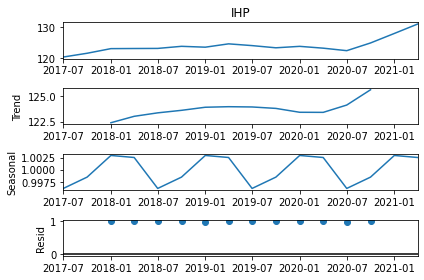

In [72]:
ihp_decompose = seasonal_decompose(df_ihp.IHP, model='multiplicable')
ihp_decompose.plot()
pyplot.show()

### Merge All Data

In [73]:
df_three_jual_ihk = df_penjualan_inflasi.rolling(3).mean()[2::3].reset_index(drop=True)

In [74]:
df_three_jual_ihk['date'] = df_three_months.index

In [75]:
df_three_jual_ihk['date'] = pd.to_datetime(df_three_jual_ihk['date'], errors='coerce')
df_three_jual_ihk = df_three_jual_ihk.set_index('date')

In [76]:
df_alldata = pd.merge(df_three_jual_ihk, df_ihp, on='date', how='outer')

In [77]:
df_alldata

,quantity,subtotal,real_unit_price,IHK,Inflasi,IHP
date,,,,,,
2017-07-01,45813.17,1389743010.00,61348061.67,130.00,0.09,120.37
2017-10-01,63238.50,1779450290.67,75703546.33,130.57,0.31,121.59
2018-01-01,57684.00,1794610380.00,79112557.67,132.33,0.33,123.09
2018-04-01,37150.67,1333593468.00,54152193.33,133.16,0.30,123.13
2018-07-01,81938.17,2469864963.73,101885529.43,134.01,0.02,123.16
2018-10-01,75687.50,1946975162.00,86275918.00,134.72,0.39,123.84
2019-01-01,53259.67,1935080615.33,95248180.00,135.81,0.12,123.56
2019-04-01,47396.83,1846456250.00,84580769.33,137.34,0.56,124.64
2019-07-01,90566.83,3080973043.33,144773168.67,138.57,0.05,124.07


### Normalisasi dan Uji Korelasi

#### Three months interval data normalization and correlation (with IHP)

In [78]:
from sklearn.preprocessing import MinMaxScaler

rows, cols = df_alldata.shape
scaler = MinMaxScaler()

for i in range(1, cols):
    df_alldata[df_alldata.columns[i]] = scaler.fit_transform(df_alldata[df_alldata.columns[i]].values.reshape(-1,1))

In [79]:
rows, cols = df_alldata.shape
flds = list(df_alldata.columns)

for i in range(0, cols):
    for j in range(i+1, cols):
        print(flds[i], ' ', flds[j], ' ', df_alldata[df_alldata.columns[i]].corr(df_alldata[df_alldata.columns[j]]))

quantity   subtotal   0.787061471564685
quantity   real_unit_price   0.7570281168783223
quantity   IHK   -0.10016559979455425
quantity   Inflasi   -0.20875712632338797
quantity   IHP   -0.11359977939875711
subtotal   real_unit_price   0.9432938099055107
subtotal   IHK   -0.41401707327036724
subtotal   Inflasi   -0.4218385849749855
subtotal   IHP   0.2575287262360299
real_unit_price   IHK   -0.35551973909600604
real_unit_price   Inflasi   -0.44423914160886446
real_unit_price   IHP   0.21988904816308327
IHK   Inflasi   0.3022324378138737
IHK   IHP   -0.4249859108469719
Inflasi   IHP   -0.013307023862185418


#### One months interval data normalization and correlation

In [80]:
rows, cols = df_penjualan_inflasi.shape
scaler = MinMaxScaler()

for i in range(1, cols):
    df_penjualan_inflasi[df_penjualan_inflasi.columns[i]] = scaler.fit_transform(df_penjualan_inflasi[df_penjualan_inflasi.columns[i]].values.reshape(-1,1))

In [81]:
rows, cols = df_penjualan_inflasi.shape
flds = list(df_penjualan_inflasi.columns)

for i in range(0, cols):
    for j in range(i+1, cols):
        print(flds[i], ' ', flds[j], ' ', df_penjualan_inflasi[df_penjualan_inflasi.columns[i]].corr(df_penjualan_inflasi[df_penjualan_inflasi.columns[j]]))

quantity   subtotal   0.786273370910764
quantity   real_unit_price   0.7068774920932891
quantity   IHK   -0.05229081999436903
quantity   Inflasi   -0.27926647783680514
subtotal   real_unit_price   0.9094437036636721
subtotal   IHK   -0.3258858322835647
subtotal   Inflasi   -0.3587421032096475
real_unit_price   IHK   -0.281108360581461
real_unit_price   Inflasi   -0.31203561048923084
IHK   Inflasi   0.22126089034690877
